In [2]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [3]:
df = pd.DataFrame()

In [6]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [12]:
df = df.drop('1abe1', axis=1)

In [14]:
import seaborn as sns

<Axes: xlabel='X1', ylabel='X2'>

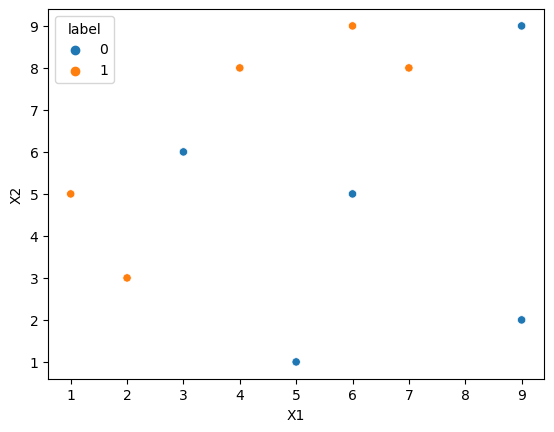

In [18]:
sns.scatterplot(x=df['X1'], y=df['X2'], hue=df['label'])

In [19]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [21]:
df['weights'] = 1/df.shape[0]

In [22]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [23]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [26]:
dt1

DecisionTreeClassifier(max_depth=1)

In [33]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [28]:
from sklearn.model_selection import train_test_split

In [41]:
dt1.fit(X, y)

DecisionTreeClassifier(max_depth=1)

In [37]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

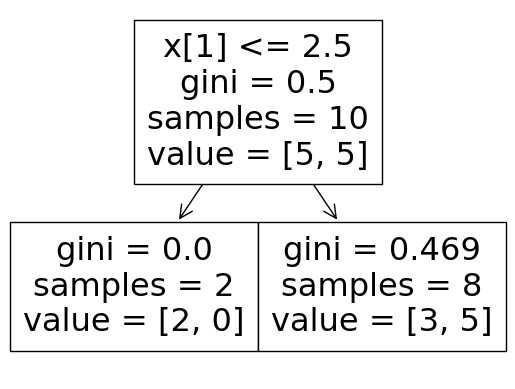

In [42]:
plot_tree(dt1)

<Axes: >

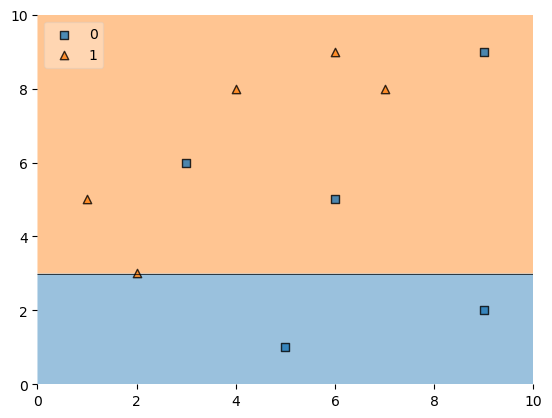

In [43]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [44]:
df['y_pred'] = dt1.predict(X)

In [45]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [46]:
def calculate_model_weight(error):

    return 0.5*np.log((1-error)/error)

In [47]:
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [55]:
def update_row_weights(row, alpha = 0.423):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [56]:
df['updated_weights'] = df.apply(update_row_weights, axis=1)

In [57]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [58]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [59]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [60]:
df['normalized_weights'].sum()

1.0

In [61]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [62]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.071475,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.166559,0.309508
3,4,8,1,0.1,1,0.065508,0.071475,0.380983
4,5,1,0,0.1,0,0.065508,0.071475,0.452458
5,6,9,1,0.1,1,0.065508,0.071475,0.523933
6,6,5,0,0.1,1,0.152653,0.166559,0.690492
7,7,8,1,0.1,1,0.065508,0.071475,0.761967
8,9,9,0,0.1,1,0.152653,0.166559,0.928525
9,9,2,0,0.1,0,0.065508,0.071475,1.000000


In [63]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [64]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
6,6,5,0,0.1,1,0.152653,0.166559,0.690492,0.523933
7,7,8,1,0.1,1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [65]:
def create_dataset(df):

    indices = []

    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

In [66]:
index_values = create_dataset(df)

In [67]:
index_values

[4, 5, 9, 0, 2, 8, 8, 8, 4, 5]

In [68]:
second_df = df.iloc[index_values, [0,1,2,3]]

In [69]:
second_df

,X1,X2,label,weights
4,5,1,0,0.1
5,6,9,1,0.1
9,9,2,0,0.1
0,1,5,1,0.1
2,3,6,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
4,5,1,0,0.1
5,6,9,1,0.1


In [70]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [71]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [72]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 7.5\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

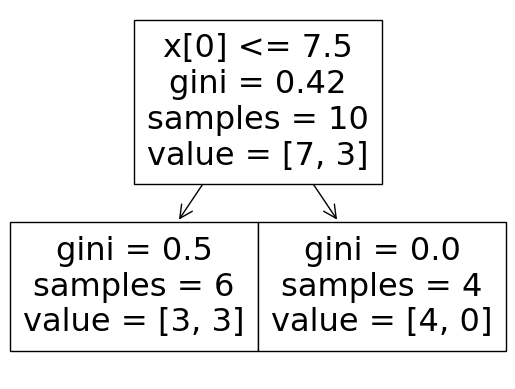

In [76]:
plot_tree(dt2)

<Axes: >

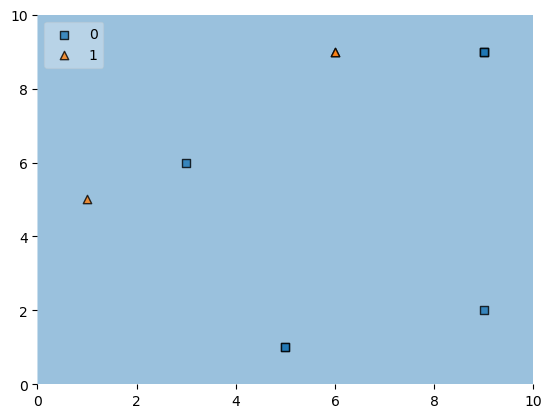

In [77]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [78]:
second_df['y_pred'] = dt2.predict(X)

In [80]:
second_df

,X1,X2,label,weights,y_pred
4,5,1,0,0.1,0
5,6,9,1,0.1,0
9,9,2,0,0.1,0
0,1,5,1,0.1,0
2,3,6,0,0.1,0
8,9,9,0,0.1,0
8,9,9,0,0.1,0
8,9,9,0,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0


In [81]:
alpha2 = calculate_model_weight(0.3)

In [82]:
alpha2

0.42364893019360184